In [17]:
%matplotlib inline

In [18]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [19]:
def overview(ax, data, first, last, min1, max1, min2, max2):
    thisdata = data.loc[(data.index >= first) & (data.index < last)]
    ax.plot(thisdata['im_size'], thisdata['walltime'], c='green')
    ax.set_xscale('log')
    ax.set_xlabel('im_size')
    ax.set_ylim([0,max1])
    ax2 = ax.twinx()
    lines = ax2.plot(thisdata['im_size'], thisdata['maxrss'] / thisdata['im_kbytes'] / 1000, c='red')
    ax2.set_ylim([min2,max2])
    
def box_variation(ax, data, first, last, min1, max1, min2, max2):
    data = data.loc[(data.index >= first) & (data.index < last)]
    ax.plot(data['box_size'], data['walltime'], c='green')
    ax.set_ylabel('walltime')
    ax.set_xlabel('box_size')
    ax.set_ylim([min1, max1])
    ax2 = ax.twinx()
    ax2.plot(data['box_size'], data['maxrss'] / data['im_kbytes'] / 1000, label='memory overhead', c='red')
    ax2.set_ylim([min2, max2])
    ax2.set_ylabel('memory overhead')
    ax.legend()
    ax2.legend()
    
def data_range(data, first, last, min1, max1, min2, max2):
    thisdata = data.loc[(data.index >= first) & (data.index < last)]
    thismin1 = min(thisdata['walltime'])
    thismax1 = max(thisdata['walltime'])
    thismin2 = min(thisdata['maxrss'] / thisdata['im_kbytes'] / 1000)
    thismax2 = max(thisdata['maxrss'] / thisdata['im_kbytes'] / 1000)
    if min1 is None:
        min1 = thismin1
        max1 = thismax1
        min2 = thismin2
        max2 = thismax2
    if thismin1 < min1:
        min1 = thismin1
    if thismax1 > max1:
        max1 = thismax1
    if thismin2 < min2:
        min2 = thismin2
    if thismax2 > max2:
        max2 = thismax2
    return min1, max1, min2, max2

def remove_baseline(data, baseline):
    data['maxrss'] = data['maxrss'] - baseline['maxrss']
    return data

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Applications/anaconda3/lib/python3.7/site-packag

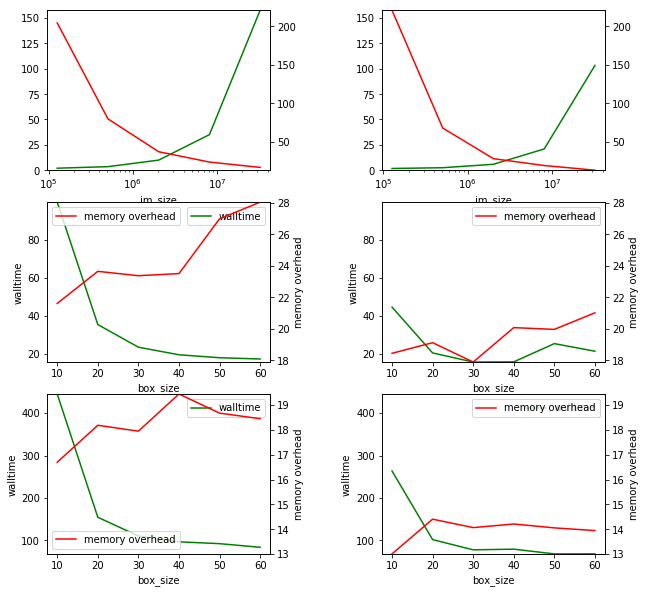

In [20]:

fig = plt.figure(figsize=(10, 10))
subplots = fig.subplots(3, 2)

basefile = 'profile_results/bmask-baseline.csv'
#basefile = 'profile_results/bobjects-profound-adacs.csv'
files = 'profile_results/profound_profiling_original.csv', 'profile_results/profound_profiling_adacs.csv'
files = 'profile_results/skygrid-original.csv', 'profile_results/skygrid-adacs.csv'
#files = 'profile_results/profound-original.csv', 'profile_results/profound-adacs.csv'
#files = 'profile_results/mask_skygrid-adacs.csv', 'profile_results/bobjects-skygrid-adacs.csv'
#files = 'profile_results/profound-original.csv', 'profile_results/profound-adacs.csv'
#files = 'profile_results/bobjects-profound-adacs.csv', 'profile_results/bobjects-pushback-profound-adacs.csv'
#files = 'profile_results/bobjects-baseline3.csv', 'profile_results/bobjects-baseline4.csv'
files = 'profile_results/mask_profound-adacs.csv', 'profile_results/bobjects-profound-adacs.csv'
files = 'profile_results/mask_profound-adacs.csv', 'profile_results/bobjects-faster-profound-adacs.csv'
files = 'profile_results/profound_profiling_original.csv', 'profile_results/28oct-profound-adacs.csv'
column_axes = subplots[:,0], subplots[:,1]
min1a = None
max1a = None
min2a = None
max2a = None

min1b = None
max1b = None
min2b = None
max2b = None

min1c = None
max1c = None
min2c = None
max2c = None

baseline = pd.read_csv(basefile, sep=' *, *')
for fname in files:
    data = pd.read_csv(fname, sep=' *, *')
    #data = remove_baseline(data, baseline)
    min1a, max1a, min2a, max2a = data_range(data,  0, 5, min1a, max1a, min2a, max2a)
    min1b, max1b, min2b, max2b = data_range(data,  5,11, min1b, max1b, min2b, max2b)
    min1c, max1c, min2c, max2c = data_range(data, 11,17, min1c, max1c, min2c, max2c)

for fname, axes in zip(files, column_axes):
    data = pd.read_csv(fname, sep=' *, *')
    #data = remove_baseline(data, baseline)
    #data['walltime'] = pd.to_datetime(data['walltime'], format='%S.%f')
    overview(axes[0], data, 0, 5, min1a, max1a, min2a, max2a)
    box_variation(axes[1], data, 5, 11, min1b, max1b, min2b, max2b)
    box_variation(axes[2], data, 11, 17, min1c, max1c, min2c, max2c)
fig.subplots_adjust(wspace=0.5)